In [1]:
import json
import pandas as pd
from gensim import corpora, models

In [2]:
import os
import glob
import re

In [3]:
mes_list = []
input_path = 'C:/Users/msi/Desktop/학교/텍스트 마이닝/assignment3/국립국어원 메신저 말뭉치(버전 1.0)'
for input_file in glob.glob(os.path.join(input_path, 'M*')):
    with open(input_file, 'r', encoding = 'UTF-8') as f:
        json_data = json.load(f)
        mes_list.append(json_data)

In [4]:
print('메신저 말뭉치의 document의 개수는 {0}개이다'.format(len(mes_list)))

메신저 말뭉치의 document의 개수는 4203개이다


In [5]:
type(mes_list)

list

In [16]:
mes_list[0]['document'][0]['utterance'][0]

{'id': 'MDRW1900000002.1.1.1',
 'form': '누나 모해??',
 'original_form': '누나 모해??',
 'speaker_id': '1',
 'time': '20191128 15:04'}

In [17]:
def givemetext(doc):
    chats = doc['document'][0]['utterance']
    chat_list = []
    for chat in chats:
        chat_list.append(chat['form'])
    
    print(chat_list)
    join_chat = ' '.join(chat_list)
    print(join_chat)
    print('-------------')

    join_chat = re.sub('[-=.,#/?!:$%{}…ㅠ~ㅜㅋㅎㅌ><ㄷname^ㄱㄴㄲ;12]', '', join_chat)
    return join_chat

In [19]:
givemetext(mes_list[0])

['누나 모해??', 'ㅋㅋㅋㅋ 일하고 있지ㅠㅠ', 'ㅋㅋㅋㅋㅋㅋ나돈데 지금 몰래 여행갈곳 찾는중 ㅎ', '오오 어디?', '외국은 돈이 없어서 못가구 ㅠ', '국내에서 온천?갈까 생각중이야', '국내에 온천이 있어?', '찾아보니까 온양온천???있던데?', '역도 있더라 ㄷㄷ', 'ㅋㅋㅋㅋ헐 대박 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 어때?', '쫌 괜춘한거 같긴한데 아직 알아보는중이라 ㅠㅠ', '누나는 어디 안가?', '나는 연말에 휴가 있어서 그때 해외로 뜰거야 ㅎㅎ', '오 해외오디???', '방콕갔다올라고 ㅋㅋㅋ 예전에 가서 카운트다운했는데 너무 재밌게 놀았어서 한번 더 가서 할라구><', '오..방콕이....베트남인가...?태국인가?', '태국이지 ㅋㅋㅋㅋㅋ 베트남은 호치민?', '아맞네맞네 ㅋㅋㅋㅋㅋ 잠깐 헷갈렷당', '나도 국내말고 해와가고싶다...', '나좀데려가조.....', '캐리어에 넣어줄까..?', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '베트남은 나랑 안맞아서 태국이 좋아 ㅠㅠ', '베트남 알레르기...?', '태국만 벌써 두번 갔다 왔는데 이번에 가면 세번째지롱', '오', '모야', '부러워', '나 해외', '나간적 한번두 없는데', '너 누나 세계여행 하고 온거 몰라?', 'ㅋㅋㅋㅋㅋㅋ진짜로??????', '작년에 8개월 나갔다왔자나 ㅎㅎ', '진짜???어디어디????', '17개국인가 18개국 갔다왔어', '와.....왠일로????', '누나가 직접?', '아니면 뭐 패키지같은거야??', '볼리비아 페루 콜롬비아 베네수엘라 멕시코 쿠바 프랑스 영국 아이슬란드 포루투칼 스페인 모로코 이집트 요르단', '아니 배낭여행 ㅋㅋㅋㅋㅋㅋ', '혼자서?!??!', '와 뭔가 부럽다...ㅠㅠ', '웅ㅋㅋㅋㅋㅋ 공항이랑 버스터미널에서 자면서', '여행했쥐', '나는 엄두도 못내겠던데....', '진짜 신기하다 ㅋㅋㅋㅋㅋ나랑 뭔가 다른세계사람같앜ㅋㅋㅋㅋㅋ', '지금까지 갔다온 나라 다합하면 30개국 될걸?', '앞으로 여행문의는 주지혜투어?', '예전에 한번 세어보니까 3

'누나 모해  일하고 있지 나돈데 지금 몰래 여행갈곳 찾는중  오오 어디 외국은 돈이 없어서 못가구  국내에서 온천갈까 생각중이야 국내에 온천이 있어 찾아보니까 온양온천있던데 역도 있더라  헐 대박  어때 쫌 괜춘한거 같긴한데 아직 알아보는중이라  누나는 어디 안가 나는 연말에 휴가 있어서 그때 해외로 뜰거야  오 해외오디 방콕갔다올라고  예전에 가서 카운트다운했는데 너무 재밌게 놀았어서 한번 더 가서 할라구 오방콕이베트남인가태국인가 태국이지  베트남은 호치민 아맞네맞네  잠깐 헷갈렷당 나도 국내말고 해와가고싶다 나좀데려가조 캐리어에 넣어줄까  베트남은 나랑 안맞아서 태국이 좋아  베트남 알레르기 태국만 벌써 두번 갔다 왔는데 이번에 가면 세번째지롱 오 모야 부러워 나 해외 나간적 한번두 없는데 너 누나 세계여행 하고 온거 몰라 진짜로 작년에 8개월 나갔다왔자나  진짜어디어디 7개국인가 8개국 갔다왔어 와왠일로 누나가 직접 아니면 뭐 패키지같은거야 볼리비아 페루 콜롬비아 베네수엘라 멕시코 쿠바 프랑스 영국 아이슬란드 포루투칼 스페인 모로코 이집트 요르단 아니 배낭여행  혼자서 와 뭔가 부럽다 웅 공항이랑 버스터미널에서 자면서 여행했쥐 나는 엄두도 못내겠던데 진짜 신기하다 나랑 뭔가 다른세계사람같앜 지금까지 갔다온 나라 다합하면 30개국 될걸 앞으로 여행문의는 주지혜투어 예전에 한번 세어보니까 30개국에 00개 도시 넘게 갔다왔는데 앜 티켓팅은 알아서 나는 뭔가 해외여행갈라치면 여권부터시작해서 짐싸고 뭐하고 알아보고 이런게 눔  ㅣ찮아서  차마못하겟어 누나처럼 장시간 여행가려면 하던것도  다 손놓고 가야해서  어쩌다 가게되써 그냥 별거 없어 국내랑 다를게 없는데 내가 집돌이라 그런걸수도 있겠다  으으 좀 나가라 넌  돌아댕겨야지 헤헤개춥존춥 추울때는 동남아가 최고야  나 택배 아져씨와서  이따 얘기하쟈 언넝 맞이해'

In [8]:
from konlpy.tag import *

In [9]:
terms = []
for mes in mes_list:
    okt = Okt()
    chat = givemetext(mes)
    tokens = okt.nouns(chat)
    terms.append(tokens)

In [13]:
terms[:5]

[['누나',
  '모해',
  '일',
  '나돈데',
  '지금',
  '몰래',
  '여행',
  '곳',
  '중',
  '어디',
  '외국',
  '돈',
  '국내',
  '온천',
  '생각',
  '국내',
  '온천',
  '온양온천',
  '역도',
  '대박',
  '쫌',
  '괜춘한거',
  '중이',
  '누나',
  '어디',
  '안',
  '나',
  '연말',
  '휴가',
  '그때',
  '해외',
  '오',
  '해외',
  '오디',
  '방콕',
  '예전',
  '카운트다운',
  '한번',
  '더',
  '구',
  '방콕',
  '베트남',
  '태국',
  '태국',
  '베트남',
  '호치민',
  '잠깐',
  '헷갈렷당',
  '국내',
  '나',
  '가조',
  '캐리어',
  '베트남',
  '나',
  '태국',
  '베트남',
  '알레르기',
  '태국',
  '벌써',
  '번',
  '이번',
  '가면',
  '세번',
  '오',
  '모야',
  '나',
  '해외',
  '적',
  '한번',
  '너',
  '누나',
  '세계',
  '여행',
  '진짜',
  '작년',
  '개월',
  '자',
  '진짜',
  '어디',
  '어디',
  '개국',
  '개국',
  '일로',
  '누나',
  '직접',
  '뭐',
  '패키지',
  '볼리비아',
  '페루',
  '콜롬비아',
  '베네수엘라',
  '멕시코',
  '쿠바',
  '프랑스',
  '영국',
  '아이슬란드',
  '포루투칼',
  '스페인',
  '모로코',
  '이집트',
  '요르단',
  '배낭여행',
  '혼자',
  '뭔가',
  '웅',
  '공항',
  '버스',
  '터미널',
  '여행',
  '쥐',
  '나',
  '엄두',
  '진짜',
  '나',
  '뭔가',
  '세계',
  '사람',
  '앜',
  '지금',
  '온',
  '나라',
  '다합',
  '개국',
 

In [9]:
dictionary = corpora.Dictionary(terms)

In [10]:
corpus = [dictionary.doc2bow(term) for term in terms]

### tfidf  계산

In [11]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

### LDA 분석

#### 분석에 앞서 나뉘어진 토픽에 해당되는 단어들을 보고 한번 더 걸러주는 작업을 시행

In [12]:
def reLDAtoDF(stop_words, terms, nTopics):
    stop_word_list = list(set(stop_words.split()))
    
    renewed_terms = []
    for term in terms:
      stop_tokens = [i for i in term if not i in stop_word_list]
      renewed_terms.append(stop_tokens)
        
    dictionary = corpora.Dictionary(renewed_terms)
    corpus = [dictionary.doc2bow(term) for term in renewed_terms]
    
    model = models.ldamodel.LdaModel(corpus, num_topics= nTopics, id2word = dictionary)
    
    word_dict = {}
    for i in range(nTopics):
      words = model.show_topic(i, topn=20)
      word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
      word_df = pd.DataFrame(word_dict)

    return dictionary, corpus, word_df, model.show_topics()

In [13]:
stop_words = '나 너 누나 진짜 거 오늘 난 우리 뭐 집 너 때 오빠 뭐 전 때 응 좀 왜 내 존나 난 지금 저 네 전 요 오 더 뭐 저 전 야야 그 것 그거 그냥 이제 그거 거기 또 것 언니 웅 또 햇 함 말\
임 개 말 옹 안 넹 이 임 안 애 해 니 애 시발 안 이 머 시 사람 엄마 데 알 바 걸 알 친구 웅웅'

### 좀더 내용에 집중하기 위해 오빠, 언니, 누나, 엄마와 같은 호칭은 다 뺐다

dictionary, corpus, word_df, show_topics = reLDAtoDF(stop_words, terms, 9)

In [14]:
word_df

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08,Topic #09
0,밥,시간,생각,생각,돈,시간,밥,맛,영화
1,점심,생각,영화,돈,시간,어디,일,밥,생각
2,퇴근,밥,시간,일단,하나,돈,맛,시간,요즘
3,시간,돈,돈,시간,낼,하나,생각,생각,보고
4,맛,일,맛,하나,생각,맛,시간,피자,시간
5,가요,내일,약간,어디,일,요즘,요즘,하나,밥
6,일,알바,언제,여행,밥,생각,하나,어디,돈
7,용,일단,보고,날,어제,일단,보고,곳,노래
8,저녁,하나,이번,정도,내일,사진,돈,치킨,드라마
9,출근,학교,밥,이번,중,한번,회사,한번,어제


In [15]:
show_topics

[(0,
  '0.012*"밥" + 0.011*"점심" + 0.008*"퇴근" + 0.006*"시간" + 0.006*"맛" + 0.006*"가요" + 0.006*"일" + 0.005*"용" + 0.005*"저녁" + 0.005*"출근"'),
 (1,
  '0.006*"시간" + 0.005*"생각" + 0.005*"밥" + 0.004*"돈" + 0.004*"일" + 0.004*"내일" + 0.004*"알바" + 0.003*"일단" + 0.003*"하나" + 0.003*"학교"'),
 (2,
  '0.005*"생각" + 0.004*"영화" + 0.004*"시간" + 0.003*"돈" + 0.003*"맛" + 0.003*"약간" + 0.003*"언제" + 0.003*"보고" + 0.002*"이번" + 0.002*"밥"'),
 (3,
  '0.006*"생각" + 0.005*"돈" + 0.004*"일단" + 0.004*"시간" + 0.004*"하나" + 0.003*"어디" + 0.003*"여행" + 0.003*"날" + 0.003*"정도" + 0.003*"이번"'),
 (4,
  '0.004*"돈" + 0.004*"시간" + 0.004*"하나" + 0.003*"낼" + 0.003*"생각" + 0.003*"일" + 0.003*"밥" + 0.002*"어제" + 0.002*"내일" + 0.002*"중"'),
 (5,
  '0.004*"시간" + 0.004*"어디" + 0.004*"돈" + 0.003*"하나" + 0.003*"맛" + 0.003*"요즘" + 0.003*"생각" + 0.002*"일단" + 0.002*"사진" + 0.002*"한번"'),
 (6,
  '0.005*"밥" + 0.004*"일" + 0.004*"맛" + 0.004*"생각" + 0.003*"시간" + 0.003*"요즘" + 0.003*"하나" + 0.003*"보고" + 0.003*"돈" + 0.003*"회사"'),
 (7,
  '0.010*"맛" + 0.007*"밥" + 0.004*"시간" + 0.004

### 위 작업을 적당히 불용어가 제거될 때 까지 반복
#### 이렇게 하는게 맞는지 잘 모르겠네요..

#### 적정 토픽수를 찾기 위해 토픽 수 에 따른 perplexity와 coherence 점수 비교

In [16]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
perplexity_values = []
coherence_values = []
for i in range(2,10):
    ldamodel = models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary, random_state = 100)
    perplexity_values.append(ldamodel.log_perplexity(corpus))
    
    coherence_model_lda = CoherenceModel(model = ldamodel, texts=terms, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

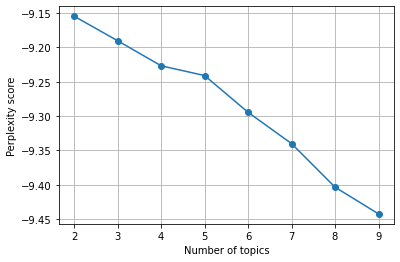

In [18]:
x = range(2,10)
plt.plot(x, perplexity_values, marker = 'o')
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.grid()
plt.show()

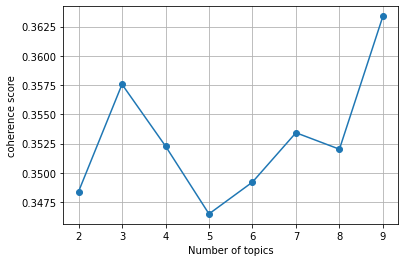

In [19]:
x = range(2,10)
plt.plot(x, coherence_values, marker = 'o')
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.grid()
plt.show()

In [20]:
print('topic : 7\n perplexity_score : {0:.4f}\n coherence_score : {1:.4f} \n\n'.format(perplexity_values[5], coherence_values[5]))
print('topic : 9\n perplexity_score : {0:.4f}\n coherence_score : {1:.4f} \n\n'.format(perplexity_values[-1], coherence_values[-1]))

topic : 7
 perplexity_score : -9.3400
 coherence_score : 0.3534 


topic : 9
 perplexity_score : -9.4423
 coherence_score : 0.3634 




#### 토픽 수 후보로 coherence 상위권인 3개 / 7개 / 9개를 골랐다. perplexity 점수 차이는 0.2 이내

### 시각화

In [21]:
import pyLDAvis
import pyLDAvis.gensim

## 토픽 개수가 4개일 때는, 1,3이 일정 부분 겹치고 나머지는 분리되어있다

In [40]:
pyLDAvis.enable_notebook()

model_3 = models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, random_state = 100)

data = pyLDAvis.gensim.prepare(model_3, corpus, dictionary)
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.023660 -0.001164       1        1  47.097866
2     -0.013799 -0.009911       2        1  33.284855
0     -0.009861  0.011075       3        1  19.617279, topic_info=      Term          Freq         Total Category  logprob  loglift
144     시간  12475.000000  12475.000000  Default  30.0000  30.0000
776     알바   6693.000000   6693.000000  Default  29.0000  29.0000
1169    학교   5366.000000   5366.000000  Default  28.0000  28.0000
900      음   6371.000000   6371.000000  Default  27.0000  27.0000
10005   신촌   2018.000000   2018.000000  Default  26.0000  26.0000
...    ...           ...           ...      ...      ...      ...
135      밥   1545.061501  11702.105769   Topic3  -5.8585  -0.3959
803     언제   1138.981842   6060.776265   Topic3  -6.1635  -0.0429
76       일   1137.841324   8601.808257   Topic3  -6.1645  -0.3941
415      도   1056.349642   5130.004682   Topic3  -6.2388   0.0485
74      이번   1062.159192   6750.780766   Topic3  -6.2333  -0.2206

[332 rows x 6 columns], token_table=       Topic      Freq Term
term                       
0          1  0.581665   가면
0          2  0.293998   가면
0          3  0.124335   가면
4049       1  0.321481    걔
4049       2  0.503679    걔
...      ...       ...  ...
93329      2  0.870456   화랑
93329      3  0.034818   화랑
1207       1  0.663020  화이팅
1207       2  0.136483  화이팅
1207       3  0.200669  화이팅

[658 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

## 토픽 개수가 7개일 때는 준수해보인다

In [23]:
pyLDAvis.enable_notebook()

model_7 = models.ldamodel.LdaModel(corpus, num_topics=7, id2word = dictionary, random_state = 100)

data = pyLDAvis.gensim.prepare(model_7, corpus, dictionary)
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.038077  0.004550       1        1  28.790433
1     -0.003164  0.059883       2        1  27.922838
4      0.045976 -0.019079       3        1  15.267377
5      0.016683 -0.009777       4        1  12.047667
3     -0.040653 -0.006764       5        1   9.194134
2     -0.022705 -0.017746       6        1   5.514027
0     -0.034214 -0.011067       7        1   1.263524, topic_info=    Term          Freq         Total Category  logprob  loglift
144   시간  12981.000000  12981.000000  Default  30.0000  30.0000
43    생각  13978.000000  13978.000000  Default  29.0000  29.0000
61    여행   3941.000000   3941.000000  Default  28.0000  28.0000
151   요즘   6885.000000   6885.000000  Default  27.0000  27.0000
135    밥  12051.000000  12051.000000  Default  26.0000  26.0000
..   ...           ...           ...      ...      ...      ...
513    맛     73.866140  10088.419147   Topic7  -6.1566  -0.5456
21     돈     74.279209  11084.400662   Topic7  -6.1510  -0.6342
900    음     63.508947   6366.345623   Topic7  -6.3077  -0.2363
337   내일     64.171558   7667.339419   Topic7  -6.2973  -0.4119
166   하나     63.499705   8591.730012   Topic7  -6.3078  -0.5363

[664 rows x 6 columns], token_table=       Topic      Freq Term
term                       
63183      4  0.865612   가렌
1339       1  0.135392   가요
1339       2  0.570481   가요
1339       3  0.031209   가요
1339       4  0.052321   가요
...      ...       ...  ...
25973      4  0.049706   흥정
25973      5  0.835063   흥정
25973      7  0.019882   흥정
41211      1  0.147203  히오스
41211      4  0.785082  히오스

[2189 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 5, 6, 4, 3, 1])

## 토픽 개수가 9개일 때는, 토픽 1,3이 일정 부분 겹쳐져 있지만 괜찮아 보임

In [24]:
pyLDAvis.enable_notebook()

model_9 = models.ldamodel.LdaModel(corpus, num_topics=9, id2word = dictionary, random_state = 100)

data = pyLDAvis.gensim.prepare(model_9, corpus, dictionary)
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.056423 -0.022441       1        1  36.954891
1      0.028264  0.069239       2        1  21.415879
6      0.040096 -0.002563       3        1  17.682098
7      0.004654 -0.000096       4        1   7.941856
4      0.026557 -0.031921       5        1   6.953900
3     -0.043539  0.016224       6        1   4.525688
5     -0.005593 -0.010771       7        1   3.597622
2     -0.049765 -0.014000       8        1   0.677437
0     -0.057096 -0.003671       9        1   0.250629, topic_info=    Term          Freq         Total Category  logprob  loglift
144   시간  13141.000000  13141.000000  Default  30.0000  30.0000
43    생각  14002.000000  14002.000000  Default  29.0000  29.0000
135    밥  12534.000000  12534.000000  Default  28.0000  28.0000
151   요즘   6476.000000   6476.000000  Default  27.0000  27.0000
21     돈  11154.000000  11154.000000  Default  26.0000  26.0000
..   ...           ...           ...      ...      ...      ...
762   아침     10.811430   4619.422277   Topic9  -6.4605  -0.0685
21     돈     13.242482  11154.807521   Topic9  -6.2577  -0.7472
166   하나     12.239289   8704.233599   Topic9  -6.3365  -0.5780
937   일단     11.654791   8115.867955   Topic9  -6.3854  -0.5569
337   내일     11.465169   7925.479282   Topic9  -6.4018  -0.5496

[824 rows x 6 columns], token_table=       Topic      Freq Term
term                       
0          1  0.257603   가면
0          2  0.300697   가면
0          3  0.150469   가면
0          4  0.128561   가면
0          5  0.076559   가면
...      ...       ...  ...
25973      3  0.026480   흥정
25973      4  0.794408   흥정
25973      5  0.013240   흥정
25973      6  0.092681   흥정
41211      1  0.972298  히오스

[2904 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 7, 8, 5, 4, 6, 3, 1])

In [41]:
nTopics = 3

# model_3

word_dict = {}
for i in range(nTopics):
  words = model_3.show_topic(i, topn=20)
  word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
  word_df_3 = pd.DataFrame(word_dict)

In [42]:
word_df_3

,Topic #01,Topic #02,Topic #03
0,시간,밥,생각
1,생각,생각,돈
2,일단,맛,시간
3,음,시간,보고
4,알바,돈,알바
5,학교,하나,일
6,어디,일,이번
7,돈,내일,한번
8,밥,일단,다시
9,정도,어디,정도


In [43]:
model_3.show_topics()

[(0,
  '0.007*"시간" + 0.004*"생각" + 0.004*"일단" + 0.004*"음" + 0.003*"알바" + 0.003*"학교" + 0.003*"어디" + 0.003*"돈" + 0.003*"밥" + 0.003*"정도"'),
 (1,
  '0.006*"밥" + 0.006*"생각" + 0.006*"맛" + 0.004*"시간" + 0.004*"돈" + 0.004*"하나" + 0.004*"일" + 0.003*"내일" + 0.003*"일단" + 0.003*"어디"'),
 (2,
  '0.005*"생각" + 0.004*"돈" + 0.003*"시간" + 0.003*"보고" + 0.003*"알바" + 0.003*"일" + 0.003*"이번" + 0.003*"한번" + 0.003*"다시" + 0.003*"정도"')]

In [28]:
nTopics = 7

# model_7

word_dict = {}
for i in range(nTopics):
  words = model_7.show_topic(i, topn=20)
  word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
  word_df_7 = pd.DataFrame(word_dict)

In [29]:
word_df_7

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07
0,시간,밥,요즘,생각,시간,돈,생각
1,생각,맛,생각,여행,알바,생각,돈
2,밥,생각,드라마,돈,생각,일단,시간
3,어디,시간,시간,요즘,돈,시간,밥
4,술,일,돈,시간,일단,하나,내일
5,날,요즘,보고,영화,일,내일,어디
6,정도,하나,일,어디,하나,날,음
7,일단,돈,한번,보고,학교,그게,알바
8,돈,저녁,어제,일,수업,막,정도
9,그게,점심,다시,하나,음,게,보고


In [30]:
model_7.show_topics()

[(0,
  '0.007*"시간" + 0.004*"생각" + 0.003*"밥" + 0.003*"어디" + 0.003*"술" + 0.002*"날" + 0.002*"정도" + 0.002*"일단" + 0.002*"돈" + 0.002*"그게"'),
 (1,
  '0.008*"밥" + 0.008*"맛" + 0.005*"생각" + 0.005*"시간" + 0.004*"일" + 0.004*"요즘" + 0.003*"하나" + 0.003*"돈" + 0.003*"저녁" + 0.003*"점심"'),
 (2,
  '0.004*"요즘" + 0.004*"생각" + 0.003*"드라마" + 0.003*"시간" + 0.003*"돈" + 0.003*"보고" + 0.003*"일" + 0.003*"한번" + 0.003*"어제" + 0.003*"다시"'),
 (3,
  '0.007*"생각" + 0.006*"여행" + 0.004*"돈" + 0.004*"요즘" + 0.004*"시간" + 0.004*"영화" + 0.004*"어디" + 0.004*"보고" + 0.003*"일" + 0.003*"하나"'),
 (4,
  '0.007*"시간" + 0.005*"알바" + 0.005*"생각" + 0.005*"돈" + 0.005*"일단" + 0.004*"일" + 0.004*"하나" + 0.003*"학교" + 0.003*"수업" + 0.003*"음"'),
 (5,
  '0.004*"돈" + 0.004*"생각" + 0.004*"일단" + 0.004*"시간" + 0.003*"하나" + 0.003*"내일" + 0.003*"날" + 0.003*"그게" + 0.003*"막" + 0.003*"게"'),
 (6,
  '0.005*"생각" + 0.004*"돈" + 0.004*"시간" + 0.004*"밥" + 0.003*"내일" + 0.003*"어디" + 0.003*"음" + 0.003*"알바" + 0.003*"정도" + 0.003*"보고"')]

In [31]:
nTopics = 9

# model_9

word_dict = {}
for i in range(nTopics):
  words = model_9.show_topic(i, topn=20)
  word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
  word_df_9 = pd.DataFrame(word_dict)

In [32]:
word_df_9

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08,Topic #09
0,시간,맛,어제,생각,시간,돈,밥,여행,생각
1,생각,밥,요즘,요즘,알바,생각,생각,시간,시간
2,밥,생각,생각,겨울,일,시간,돈,돈,돈
3,운동,시간,드라마,여행,생각,일,맛,생각,일단
4,맛,일,일,영화,돈,내일,시간,어디,알바
5,어디,요즘,돈,일,일단,하나,내일,곳,하나
6,날,점심,한번,돈,하나,일단,정도,보고,음
7,점심,하나,시간,하나,수업,자기,어디,사진,내일
8,요즘,저녁,보고,운동,영화,게,하나,일단,이번
9,정도,퇴근,밥,보고,학교,정도,한번,정도,밥


In [33]:
model_9.show_topics()

[(0,
  '0.005*"시간" + 0.003*"생각" + 0.003*"밥" + 0.002*"운동" + 0.002*"맛" + 0.002*"어디" + 0.002*"날" + 0.002*"점심" + 0.002*"요즘" + 0.002*"정도"'),
 (1,
  '0.009*"맛" + 0.009*"밥" + 0.005*"생각" + 0.005*"시간" + 0.004*"일" + 0.004*"요즘" + 0.004*"점심" + 0.004*"하나" + 0.003*"저녁" + 0.003*"퇴근"'),
 (2,
  '0.003*"어제" + 0.003*"요즘" + 0.003*"생각" + 0.003*"드라마" + 0.003*"일" + 0.003*"돈" + 0.003*"한번" + 0.003*"시간" + 0.003*"보고" + 0.003*"밥"'),
 (3,
  '0.007*"생각" + 0.005*"요즘" + 0.004*"겨울" + 0.004*"여행" + 0.004*"영화" + 0.004*"일" + 0.003*"돈" + 0.003*"하나" + 0.003*"운동" + 0.003*"보고"'),
 (4,
  '0.007*"시간" + 0.006*"알바" + 0.005*"일" + 0.005*"생각" + 0.005*"돈" + 0.004*"일단" + 0.004*"하나" + 0.004*"수업" + 0.003*"영화" + 0.003*"학교"'),
 (5,
  '0.004*"돈" + 0.004*"생각" + 0.003*"시간" + 0.003*"일" + 0.003*"내일" + 0.003*"하나" + 0.003*"일단" + 0.003*"자기" + 0.003*"게" + 0.003*"정도"'),
 (6,
  '0.005*"밥" + 0.005*"생각" + 0.004*"돈" + 0.004*"맛" + 0.004*"시간" + 0.003*"내일" + 0.003*"정도" + 0.003*"어디" + 0.003*"하나" + 0.003*"한번"'),
 (7,
  '0.006*"여행" + 0.005*"시간" + 0.004*"돈" +

#### show_topics()로 좀더 세분화해서 본 결과,
<span style="color:red">3개</span>로 나눈 것은 셋 다 모두 '시간'과 '생각'을 공통적으로 포함하고 있다.


1 : 알바, 학교, 어디, 돈, 밥

2 : 밥, 맛, 돈, 일, 내일 

3 : 돈, 알바, 일

잘 구분된거 같아 보이지 않는다.


<span style="color:red">7개</span>로 나눈 것 역시 7개 토픽 모두 '시간'과 '생각'이외에도 '돈'이 상위권에 모든 토픽에 포함되어 있다.

1 : 밥, 술, 날, 맛, 점심, 운동

2 : 밥, 맛, 일, 저녁, 점심, 아침, 퇴근

3 : 드라마, 일, 밥

4 : 여행, 영화, 어디, 밥, 노래

5 : 알바, 일, 학교, 수업, 공부

6 : 일, 언제, 어디, 사진, 학교

7 : 밥, 알바, 맛, 사진, 학교, 어제, 낼, 언제


<span style="color:red">9개</span>로 나눈 것은 7개로 나눈 것과 마찬가지로 '시간'과 '생각'이 모든 토픽에 상위권에 위치해있지만 나름 구분이 되어 있는 것으로 보인다.




색깔을 기준으로 9개 토픽을 모아봤을 떄, 전반적으로 다 친구와 또는 친구에 대해 일상적인 대화내용에서
    
#####   1. 식사 + 돈 : 1번 / 5번
#####    2. 식사 + 일 : 2번 / 9번
#####    3. 학업 + 돈 + 일 : 3번 / 4번
#####    4. 식사 + 돈 + 일 : 6번 / 7번 / 8번

으로 볼 수 있고 3번은 여행,사진에 대한 이야기 6번은 운동에 대한 이야기가 추가되어 있다

### 제공된 토픽을 이용해 실제 토픽 분류 알아보기 

In [34]:
topic_list = []
for i in range(len(mes_list)):
    topic_list.append(mes_list[i]['document'][0]['metadata']['topic'])

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
%matplotlib inline

In [36]:
df = pd.DataFrame(topic_list)

In [37]:
y = list(df[0].value_counts().values)
x = list(df[0].value_counts().index)

In [38]:
x = ['식음료',
 '개인 및 관계',
 '여가와 오락',
 '여행',
 '일상',
 '주거와 생활',
 '미용과 건강',
 '일과 직업',
 '예술, 문화 생활',
 '날씨와 계절',
 '교육 및 학교',
 '쇼핑',
 '교통',
 '시사, 사회',
 '행사 및 모임',
 '전공/전문 지식',
 '공공 서비스',
 '여행, 주거와 생활']

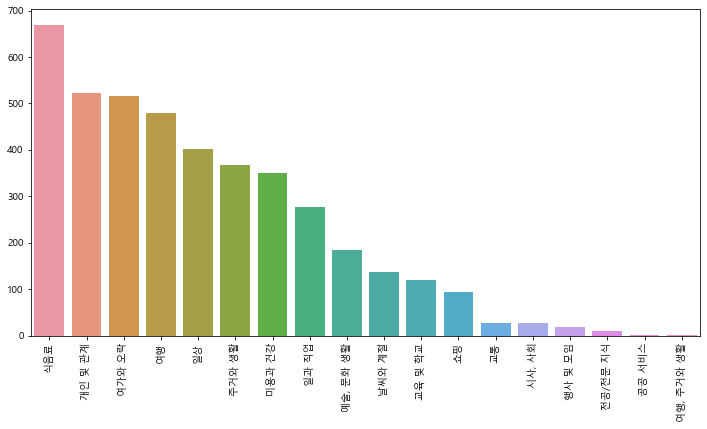

In [39]:
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x,y)
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation = 90)
plt.show()

##### 내가 분석한 주제로는 친구와의 일상 내용 중, 학업에 대한 얘기, 음식에 대한 얘기, 일에 대한 얘기 3가지로 분류했는데
실제로는 식사가 1순위고 여가와 오락, 여행, 일상 등이 주된 내용이었다.
일과 직업이나 교육 및 학교도 포함되어 있긴 했지만 중위권에 머무르고 있는 내용들이었다.

앞에서 불용어 과정에서 엄마, 오빠, 형과 같은 호칭을 없애고 친구만 남겼는데 그런 부분에서 개인 및 관계에 대한 주제는 뽑아내지 못한게 아닌가 싶다.
또한, 불용어에서 호칭을 제거하는 부분에서 '친구'도 빼야하나 고민을 많이 하고 안뺐는데 결국 '친구'만 반복적으로 주제들에 포함되는 결과가 나온 것으로 보아
'친구'도 아예 제거를 하거나 아니면 호칭도 다 포함해서 돌리거나 했어야 했던거 같다.